# Import Statement

In [ ]:
import pandas as pd
import numpy as np
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mapping Genre

In [ ]:
song_info_df = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/songs_info_df.pkl')

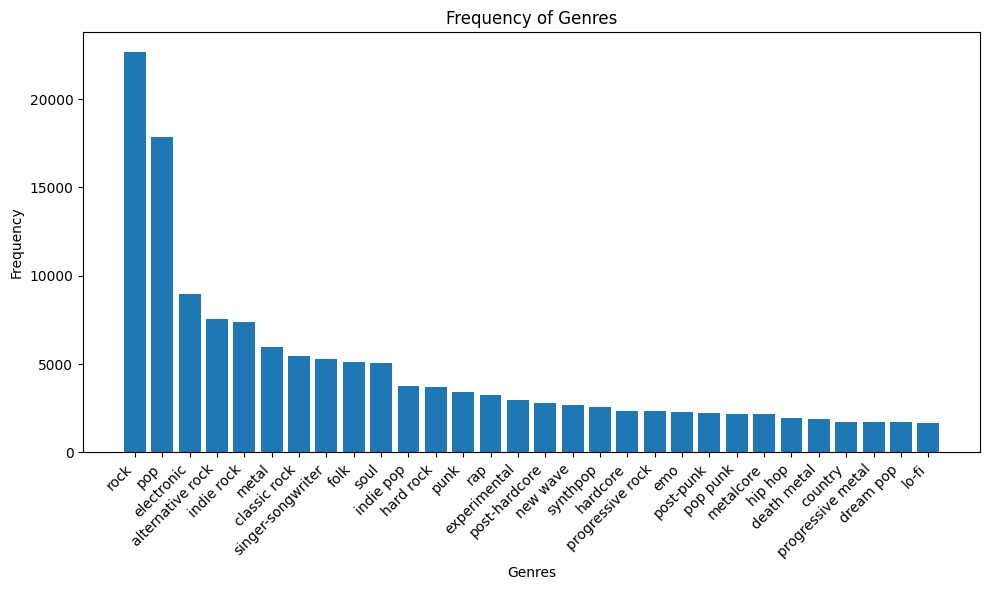

In [ ]:
from collections import Counter

genres = song_info_df['genres'].explode().tolist()
genre_counts = Counter(genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Sort the DataFrame by count
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Plot the frequencies
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'][:30], genre_df['Count'][:30])
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
song_info_df['genre count'] = song_info_df['genres'].apply(len)

For any genre that has less than 1000 entries, I'm going to remove it from its genre list.

In [ ]:
top_genres = list(genre_df[genre_df['Count'] >= 1000]['Genre'])

In [ ]:
#only taking genres that are in our "top genres", and also taking last word of multi-word genres
 #(this accounted for a lot of the subgenres like classic rock, indie rock, alternative rock, etc)
 #basically I figured for genres that have 2 key words (ie pop rock, pop punk) the first word is describing the second, so the second is the key genre

song_info_df['updated genre'] = song_info_df['genres'].apply(lambda x: [g.split()[-1] for g in x if g in top_genres])

In [ ]:
#See what genres are left
set([g for sublist in list(song_info_df['updated genre']) for g in sublist])

{'ambient',
 'blues',
 'britpop',
 'country',
 'electronic',
 'electropop',
 'emo',
 'experimental',
 'folk',
 'funk',
 'grunge',
 'hardcore',
 'hop',
 'jazz',
 'lo-fi',
 'metal',
 'metalcore',
 'pop',
 'post-hardcore',
 'post-punk',
 'punk',
 'rap',
 'rock',
 'shoegaze',
 'singer-songwriter',
 'soul',
 'soundtrack',
 'synthpop',
 'wave'}

In [ ]:
#now that we have a manageable amount of genres, can manually group them

genre_groups = {
    'Rock': ['rock'],
    'Alternative': ['grunge', 'metal', 'metalcore', 'post-hardcore', 'post-punk', 'punk', 'emo', 'hardcore', 'shoegaze'],
    'Pop': ['electropop', 'pop', 'synthpop', 'britpop'],
    'Electronic': ['ambient', 'electronic', 'experimental', 'lo-fi', 'wave'],
    'Hip Hop & Rap': ['hop', 'rap'],
    'Jazz & Blues': ['blues', 'jazz'],
    'Country & Folk': ['country', 'folk', 'singer-songwriter'],
    'Soul & Funk': ['funk', 'soul'],
    'Soundtracks': ['soundtrack']
}

def map_genres(genres):
    mapped_genres = []
    for genre in genres:
        for key, values in genre_groups.items():
            if genre in values:
                mapped_genres.append(key)
    return list(set(mapped_genres))

song_info_df['mapped_genres'] = song_info_df['genres'].apply(map_genres)


In [ ]:
Counter(list(song_info_df['mapped_genres'].apply(len)))

Counter({1: 50948, 0: 14324, 2: 17279, 3: 1495, 4: 56, 5: 1})

In [ ]:
one_genre_df = song_info_df[song_info_df['mapped_genres'].apply(len) == 1]
one_genre_df['mapped_genres'] = one_genre_df['mapped_genres'].apply(lambda x: x[0])
one_genre_df.groupby('mapped_genres').count().sort_values('id', ascending=False)

<ipython-input-13-c622a78e8f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_genre_df['mapped_genres'] = one_genre_df['mapped_genres'].apply(lambda x: x[0])


,id,genres,tags,lang,artist,song,album_name,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms,genre count,updated genre
mapped_genres,,,,,,,,,,,,,,,,,,,
Alternative,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426,11426
Rock,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314,11314
Pop,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237,10237
Electronic,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209,6209
Country & Folk,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262
Soul & Funk,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527,2527
Hip Hop & Rap,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440
Jazz & Blues,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
Soundtracks,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468


In [ ]:
#Unfortunately don't think we have enough to keep soundtracks
one_genre_df = one_genre_df[one_genre_df['mapped_genres'] != 'Soundtracks']
del one_genre_df['genre count']
del one_genre_df['updated genre']

In [ ]:
one_genre_df.to_csv('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/one_genre_df.csv', index=False)
one_genre_df.to_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/one_genre_df.pkl')

# Expanding on Genre Labels

In [ ]:
train_df = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/train_df.pkl')
validation_df = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/validation_df.pkl')
test_df = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/test_df.pkl')

In [ ]:
train_df.head()

,id,genres,tags,lang,artist,song,album_name,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms,mapped_genres,lyrics_id,lyrics
0,0YBEBBsvEhueTFKs,"[metal, alternative metal, alternative rock, n...","[metal, alternative metal, deftones, alternati...",en,Deftones,Deathblow,Deftones,09QuitJuAP87RoBSpiCXPs,37.0,2003,0.556,0.6890,8.0,0.0,0.383,128.064,328173,Alternative,0YBEBBsvEhueTFKs,Soon as you came in all the beast went away\nT...
1,iyxKHmSwk4upK59f,"[rock, classic rock, hard rock]","[rock, classic rock, queen, hard rock]",en,Queen,Ride the Wild Wind,Innuendo,7rkrEyowp24CGvy0vE3snq,22.0,1991,0.566,0.6950,5.0,1.0,0.376,113.808,281440,Rock,iyxKHmSwk4upK59f,"Ride the wild wind\n(Push the envelope, don't ..."
2,Pt8zYJlZoAfSrJVD,[rap],"[trap, rap, hip-hop, rnb]",en,YNW Melly,Rolling Loud,We All Shine,1wX1DO1MBKec6DeWpTe6fM,57.0,2019,0.764,0.4740,9.0,1.0,0.151,132.005,204544,Hip Hop & Rap,Pt8zYJlZoAfSrJVD,"Hey, hey\nYou know the mountains and the sun f..."
3,NnsTQ8qIJeARR2PX,[rock],"[rock, holiday]",en,Ash,Pacific Palisades,Free All Angels,5tvLu5uwx0ObRyJgOCZjX5,12.0,1998,0.356,0.9760,2.0,1.0,0.566,168.428,116760,Rock,NnsTQ8qIJeARR2PX,You were standing on the shore\nListening to t...
4,0hhgAPscs36TcQI6,[folk],"[folk, songs, guud]",en,Mount Eerie,I Have Been Told That My Skin Is Exceptionally...,Dawn,57rro2VcnlGgDu9l7QWXic,17.0,2004,0.483,0.0519,9.0,1.0,0.232,101.548,101707,Country & Folk,0hhgAPscs36TcQI6,Should there be songs?\nShould my hair be long...


In [ ]:
def update_genre_mapping(df, min_count=1000):
  genres = df['genres'].explode().tolist()
  genre_counts = Counter(genres)
  genre_df = pd.DataFrame(genre_counts.items(), columns = ['Genre', 'Count'])

  #getting the top genres
  top_genres = list(genre_df[genre_df['Count'] >= min_count]['Genre'])

  # creating genre mapping
  genre_mapping = {g: g for g in top_genres}

  return genre_mapping, top_genres

def map_genres(genres, mapping):
  # if there is only 1 genre, then return that genre in the mapping
  if len(genres) == 1:
        return genres[0]
  #count the genre
  genre_counts = Counter(genres)

  #if any genre appears more than once, return the most common genre

  for genre, count in genre_counts.items():
        if count > 1:
            return genre

  # if all genres are different, return the first genre
  return genres[0]


def update_genre_column(df, mapping):
    df['updated_genre'] = df['genres'].apply(lambda x: map_genres(x, mapping))
    return df


In [ ]:
genre_mapping, top_genres = update_genre_mapping(train_df, min_count=1000)
train_df = update_genre_column(train_df, genre_mapping)
validation_df = update_genre_column(validation_df, genre_mapping)
test_df = update_genre_column(test_df, genre_mapping)

In [ ]:
def count_genres(genre_string):
    return len(genre_string.split(', '))

train_genre_counts = train_df['updated_genre'].apply(count_genres)
val_genre_counts = validation_df['updated_genre'].apply(count_genres)
test_genre_counts = test_df['updated_genre'].apply(count_genres)

train_counts = train_genre_counts.value_counts().sort_index()
val_counts = val_genre_counts.value_counts().sort_index()
test_counts = test_genre_counts.value_counts().sort_index()

print("Train Genre Counts:")
print(train_counts)

print("\nValidation Genre Counts:")
print(val_counts)

print("\nTest Genre Counts:")
print(test_counts)

Train Genre Counts:
updated_genre
1    40384
Name: count, dtype: int64

Validation Genre Counts:
updated_genre
1    5048
Name: count, dtype: int64

Test Genre Counts:
updated_genre
1    5048
Name: count, dtype: int64


In [ ]:
train_unique_genres = train_df['updated_genre'].unique()
val_unique_genres = validation_df['updated_genre'].unique()
test_unique_genres = test_df['updated_genre'].unique()

# Count the number of unique genres
train_unique_genre_count = len(train_unique_genres)
val_unique_genre_count = len(val_unique_genres)
test_unique_genre_count = len(test_unique_genres)

In [ ]:
train_df['updated_genre'].unique()

array(['metal', 'rock', 'rap', 'folk', 'synthpop', 'experimental',
       'power metal', 'singer-songwriter', 'melodic death metal',
       'shoegaze', 'post-hardcore', 'funk', 'pop', 'alternative rock',
       'electronic', 'symphonic metal', 'soul', 'classic rock', 'disco',
       'hard rock', 'hardcore', 'post-punk', 'death metal',
       'progressive rock', 'dream pop', 'punk', 'indie pop',
       'viking metal', 'thrash metal', 'industrial rock', 'indie rock',
       'metalcore', 'emo', 'industrial metal', 'power pop',
       'tropical house', 'hip hop', 'pop punk', 'black metal',
       'progressive metal', 'new wave', 'jangle pop', 'trance', 'jazz',
       'electro', 'motown', 'garage rock', 'midwest emo', 'electro house',
       'pop rock', 'electronica', 'screamo', 'glam rock', 'house',
       'ambient', 'emocore', 'country', 'new age', 'deep house',
       'electronic rock', 'ebm', 'melodic hardcore', 'deathcore', 'lo-fi',
       'post-rock', 'art pop', 'soft rock', 'gothic m

In [ ]:
condensed_genre_mapping = {
    'Metal': [
        'metal', 'power metal', 'melodic death metal', 'symphonic metal', 'death metal', 'thrash metal', 'industrial metal',
        'metalcore', 'black metal', 'progressive metal', 'doom metal', 'groove metal', 'nu metal', 'speed metal',
        'technical death metal', 'progressive metalcore', 'viking metal', 'gothic metal', 'melodic black metal',
        'stoner metal', 'sludge metal', 'symphonic black metal', 'atmospheric black metal', 'brutal death metal',
        'symphonic death metal', 'deathcore', 'grindcore', 'melodic metalcore', 'progressive deathcore', 'industrial',
        'post-metal', 'chaotic hardcore', 'funk metal'
    ],
    'Hip Hop & Rap': [
        'rap', 'hip hop', 'trap', 'grime', 'gangsta rap', 'jazz rap', 'emo rap', 'abstract hip hop', 'alternative hip hop',
        'underground rap', 'experimental hip hop', 'pop rap', 'old school hip hop', 'latin hip hop', 'nigerian hip hop'
    ],
    'Electronic': [
        'electronic', 'electro', 'house', 'trance', 'dubstep', 'techno', 'edm', 'synthpop', 'electropop', 'electronica',
        'electro house', 'future house', 'deep house', 'progressive house', 'tech house', 'tropical house', 'chillwave',
        'futurepop', 'electro swing', 'chillstep', 'electroclash', 'electro-industrial', 'hardstyle', 'ambient', 'dark wave',
        'drum and bass', 'jungle', 'breakbeat', 'industrial', 'downtempo', 'glitch', 'glitch hop', 'happy hardcore',
        'hardcore techno', 'trip hop', 'uk garage', 'vaporwave', 'witch house', 'synthwave', 'future garage',
        'progressive trance', 'psytrance', 'acid house', 'uk funky', 'moombahton', 'phonk', 'minimal techno', 'freestyle',
        'garage', 'wave', 'new wave', 'disco'
    ],
    'Pop': [
        'dream pop', 'pop', 'pop rock', 'synthpop', 'indie pop', 'power pop', 'baroque pop', 'chamber pop', 'dance pop',
        'art pop', 'k-pop', 'bubblegum pop', 'teen pop', 'twee pop', 'j-pop', 'folk-pop', 'alternative pop'
    ],
    'Rock': [
        'indie rock', 'rock', 'hard rock', 'classic rock', 'alternative rock', 'punk rock', 'garage rock', 'glam rock',
        'progressive rock', 'psychedelic rock', 'shoegaze', 'post-rock', 'southern rock', 'blues rock', 'folk rock',
        'surf rock', 'math rock', 'soft rock', 'noise rock', 'krautrock', 'experimental rock', 'art rock', 'noise pop',
        'mathcore', 'stoner rock', 'piano rock', 'gothic rock', 'j-rock', 'britpop', 'grunge'
    ],
    'Punk': [
        'pop punk', 'punk', 'ska punk', 'anarcho-punk', 'post-punk', 'oi', 'hardcore punk', 'garage punk', 'horror punk',
        'skate punk', 'midwest emo', 'screamo', 'emocore', 'melodic hardcore', 'hardcore', 'emo', 'post-hardcore', 'nyhc',
        'dance-punk'
    ],
    'Folk': [
        'folk', 'indie folk', 'contemporary folk', 'folk rock', 'folk metal', 'neofolk', 'psychedelic folk', 'folk punk',
        'singer-songwriter', 'freak folk', 'afrobeat'
    ],
    'Jazz': [
        'jazz', 'jazz fusion', 'smooth jazz', 'vocal jazz', 'nu jazz', 'free jazz', 'acid jazz', 'jazz rap', 'lounge'
    ],
    'Classical': [
        'classical', 'orchestral', 'symphony', 'chamber music', 'baroque', 'opera', 'harpsichord'
    ],
    'Rhythm & Blues': [
        'blues', 'rhythm and blues', 'blues rock', 'soul', 'motown'
    ],
    'Country': [
        'country', 'country rock', 'alt-country', 'country pop', 'bluegrass', 'americana'
    ],
    'Reggae': [
        'reggae', 'dub', 'ska', 'rocksteady', 'dancehall'
    ],
    'Latin': [
        'latin', 'reggaeton', 'salsa', 'bachata', 'tango', 'mariachi', 'bossa nova', 'latin rock', 'mpb'
    ],
    'Alternative': [
        'experimental', 'avant-garde', 'new jack swing', 'beats', 'madchester', 'dark cabaret',
        'trancecore', 'spoken word', 'no wave', 'funk', 'doo-wop', 'a cappella', 'easy listening', 'alternative metal',
        'indietronica', 'cabaret', 'tropical', 'new weird america', 'worship', 'k-indie', 'outsider', 'dark ambient', 'lo-fi'
    ]
}

# flatten the mapping for easier lookup
flattened_genre_mapping = {genre: broad_category for broad_category, genres in condensed_genre_mapping.items() for genre in genres}


def map_to_broad_genre(genres):
    for genre in genres:
        if genre in flattened_genre_mapping:
            return flattened_genre_mapping[genre]
    return 'Other'  # Default to 'Other' if no match is found


def update_to_broad_genre(df):
    df['broad_genre'] = df['genres'].apply(map_to_broad_genre)
    return df


train_df = update_to_broad_genre(train_df)
validation_df = update_to_broad_genre(validation_df)
test_df = update_to_broad_genre(test_df)



In [ ]:
train_other_count = (train_df['broad_genre'] == 'Other').sum()
train_other_count

0

In [ ]:
train_df['broad_genre'].unique()

array(['Metal', 'Rock', 'Hip Hop & Rap', 'Folk', 'Pop', 'Alternative',
       'Punk', 'Electronic', 'Rhythm & Blues', 'Jazz', 'Country',
       'Classical', 'Latin', 'Reggae'], dtype=object)

In [ ]:
validation_df['broad_genre'].unique()

array(['Rhythm & Blues', 'Jazz', 'Metal', 'Pop', 'Hip Hop & Rap', 'Rock',
       'Punk', 'Folk', 'Electronic', 'Alternative', 'Country', 'Reggae',
       'Classical'], dtype=object)

In [ ]:
test_df['broad_genre'].unique()

array(['Hip Hop & Rap', 'Metal', 'Country', 'Electronic', 'Punk', 'Pop',
       'Rock', 'Folk', 'Rhythm & Blues', 'Alternative', 'Jazz', 'Reggae',
       'Latin'], dtype=object)

Train have 14 labels while the validation and test set have only 13 labels. Validaton is missing latin label and test is missing classical label. Because of this I will recombine all of the data set, shuffle it, and then resplit it so that way they all have equal amount of labels

In [ ]:
from sklearn.model_selection import train_test_split

#combing the dataset
combined_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)

#reshuffeling
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

#splittting the data set
train_df, temp_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df['broad_genre'], random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['broad_genre'], random_state=42)

# checking to see how many label they all have
unique_train_labels = train_df['broad_genre'].unique()
unique_validation_labels = validation_df['broad_genre'].unique()
unique_test_labels = test_df['broad_genre'].unique()

print("Unique train labels:", unique_train_labels)
print("Unique validation labels:", unique_validation_labels)
print("Unique test labels:", unique_test_labels)


Unique train labels: ['Pop' 'Hip Hop & Rap' 'Rock' 'Punk' 'Alternative' 'Electronic' 'Metal'
 'Folk' 'Rhythm & Blues' 'Jazz' 'Country' 'Latin' 'Reggae' 'Classical']
Unique validation labels: ['Punk' 'Rhythm & Blues' 'Pop' 'Rock' 'Country' 'Hip Hop & Rap'
 'Electronic' 'Metal' 'Folk' 'Alternative' 'Jazz' 'Classical' 'Latin'
 'Reggae']
Unique test labels: ['Alternative' 'Pop' 'Punk' 'Metal' 'Rock' 'Folk' 'Hip Hop & Rap'
 'Rhythm & Blues' 'Electronic' 'Country' 'Jazz' 'Reggae' 'Latin'
 'Classical']


In [ ]:
train_df.shape

(40384, 22)

In [ ]:
validation_df.shape

(5048, 22)

In [ ]:
# train_df.to_csv('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_train_df.csv', index=False)
# train_df.to_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_train_df.pkl')

# validation_df.to_csv('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_validation_df.csv', index=False)
# validation_df.to_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_validation_df.pkl')

# test_df.to_csv('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_test_df.csv', index=False)
# test_df.to_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_test_df.csv.pkl')


# Loading new data set to help fill class imbalance


In [ ]:
new_dataset = pd.read_csv('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/tcc_ceds_music.csv')

In [ ]:
new_dataset.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
new_dataset['genre'].value_counts()

genre
pop        7042
country    5445
blues      4604
rock       4034
jazz       3845
reggae     2498
hip hop     904
Name: count, dtype: int64

In [ ]:
unbalance_combine['broad_genre'].value_counts()

broad_genre
Rock              13138
Pop                9680
Electronic         5099
Metal              4998
Punk               4898
Folk               4028
Hip Hop & Rap      2477
Rhythm & Blues     2365
Alternative        1817
Country            1070
Jazz                736
Reggae              119
Latin                42
Classical            13
Name: count, dtype: int64

In [ ]:
new_dataset['topic'].value_counts()

topic
sadness       6096
violence      5710
world/life    5420
obscene       4882
music         2303
night/time    1825
romantic      1524
feelings       612
Name: count, dtype: int64

In [ ]:
# loading in the dataset that have music4all data
unbalance_train = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_train_df.pkl')
unbalance_val = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_validation_df.pkl')
unbalance_test = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_test_df.csv.pkl')

In [ ]:
#combing all unbalance dataframe  into one
unbalance_combine = pd.concat([unbalance_train, unbalance_val, unbalance_test], ignore_index=True)

In [ ]:
unbalance_combine.head()

,id,genres,tags,lang,artist,song,album_name,spotify_id,popularity,release,...,key,mode,valence,tempo,duration_ms,mapped_genres,lyrics_id,lyrics,updated_genre,broad_genre
0,vaTUDcCwxbKUj72o,[pop],"[sampling, the cranberries, zombie, pop]",en,Eminem,In Your Head,Revival,5qykEZTHAcplCLrynoLRnN,60.0,2017,...,1.0,1.0,0.252,82.918,182640,Pop,vaTUDcCwxbKUj72o,"What's in your head, in your head\nZombie, zom...",pop,Pop
1,0rYt4Pks3wZM7axD,[rap],"[shawnna, hip-hop, rap, female rap]",en,Shawnna,Gettin' Some,Block Music,4uNisev7PGUAixBOagpgyY,39.0,2006,...,4.0,0.0,0.648,78.059,202760,Hip Hop & Rap,0rYt4Pks3wZM7axD,"Gettin', gettin', gettin'\n\nI was gettin' som...",rap,Hip Hop & Rap
2,K3XPiN69md8ss0N5,"[rap, west coast rap]","[hip-hop, rap, gangsta rap, 2pac, west coast rap]",en,2Pac,Ambitionz az a Ridah,All Eyez On Me,3ssX20QT5c3nA9wk78V1LQ,74.0,1996,...,2.0,1.0,0.805,87.279,278387,Hip Hop & Rap,K3XPiN69md8ss0N5,"I won't deny it, I'm a straight ridah\nYou don...",rap,Hip Hop & Rap
3,HDdHAn6CFbKOsme4,[rock],"[rock, alternative, american, fav, 2017, tess]",en,The War on Drugs,Pain,A Deeper Understanding,59P1nrdEImkAKa1nyW9X2e,57.0,2017,...,7.0,0.0,0.482,115.975,330760,Rock,HDdHAn6CFbKOsme4,Go to bed now I can tell\nPain is on the way o...,rock,Rock
4,FhG1z1oOGeize5ny,"[pop, eurodance]","[pop, 90s, dance, eurodance]",en,Ace of Base,Happy Nation,The Sign (US Album) [Remastered],7fb22pjF62S9r1s1pian5K,46.0,1993,...,1.0,1.0,0.670,96.049,255413,Pop,FhG1z1oOGeize5ny,Laudate omnes gentes laudate\nMagnificat en se...,pop,Pop


In [ ]:
unbalance_combine.columns

Index(['id', 'genres', 'tags', 'lang', 'artist', 'song', 'album_name',
       'spotify_id', 'popularity', 'release', 'danceability', 'energy', 'key',
       'mode', 'valence', 'tempo', 'duration_ms', 'mapped_genres', 'lyrics_id',
       'lyrics', 'updated_genre', 'broad_genre'],
      dtype='object')

In [ ]:
new_dataset.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [ ]:
# finding matching colums between new_data and unbalance_combine

unbalance_columns = set(unbalance_combine.columns)
new_dataset_columns = set(new_dataset.columns)
matching_columns = unbalance_columns.intersection(new_dataset_columns)

print('Matching columns between unbalance_combine and new_dataset:')
print(matching_columns)


Matching columns between unbalance_combine and new_dataset:
{'lyrics', 'release_date', 'artist_name', 'valence', 'danceability', 'track_name', 'energy'}
